# Suicide Rates Overview 1985 to 2016

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df = pd.read_csv("C:/archive (1)/master.csv")

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Features overview

Let look at some features of our dataset in detail:

In [5]:
df['sex'].max()

'male'

In [6]:
df['age'].max()

'75+ years'

In [7]:
df['age'].min()

'15-24 years'

In [8]:
df['generation'].max()

'Silent'

In [9]:
df['generation'].min()

'Boomers'

In [10]:
df['country'].max()

'Uzbekistan'

In [11]:
df['country'].min()

'Albania'

In [12]:
df['suicides/100k pop'].max()

224.97

In [13]:
df['suicides/100k pop'].min()

0.0

### Duplicates and Missing Values

Let's check if we have any duplicated values in our dataset.

In [5]:
# Check for duplicates, this adds a new column to the dataset
df["is_duplicate"]= df.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df)}")
print(f"#duplicated= {len(df[df['is_duplicate']==True])}")

#total= 27820
#duplicated= 0


It seems that we don't have duplicates. Let's impute missing values using mean (or equally acceptable median) for numerical values and mode for nominal values.

In [6]:
# Handling missing values
print(df.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
is_duplicate              0
dtype: int64


In [7]:
# We do have NaN
display(df[df['HDI for year'].isnull()])

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_duplicate
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,False
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,False
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,False
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,False
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27755,Uzbekistan,2009,female,75+ years,7,318983,2.19,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent,False
27756,Uzbekistan,2009,female,35-54 years,65,3263931,1.99,Uzbekistan2009,NaN,"33,689,223,673",1332,Boomers,False
27757,Uzbekistan,2009,female,55-74 years,15,1105076,1.36,Uzbekistan2009,NaN,"33,689,223,673",1332,Silent,False
27758,Uzbekistan,2009,male,5-14 years,37,2805898,1.32,Uzbekistan2009,NaN,"33,689,223,673",1332,Generation Z,False


In [8]:
# Mean values of numerical columns
means = {c:df[c].mean() for c in df.columns if df[c].dtype != object}

print(f"mean-HDI for year= {means['HDI for year']}")

# Impute
df['HDI for year'] = df['HDI for year'].fillna(means['HDI for year'])

# Check with the previous cell results
display(df.loc[[24,25,26,27,28]])

mean-HDI for year= 0.7766011477761837


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_duplicate
24,Albania,1989,male,75+ years,2,22500,8.89,Albania1989,0.776601,"2,335,124,988",833,G.I. Generation,False
25,Albania,1989,male,25-34 years,18,283600,6.35,Albania1989,0.776601,"2,335,124,988",833,Boomers,False
26,Albania,1989,male,35-54 years,15,318400,4.71,Albania1989,0.776601,"2,335,124,988",833,Silent,False
27,Albania,1989,male,55-74 years,6,142100,4.22,Albania1989,0.776601,"2,335,124,988",833,G.I. Generation,False
28,Albania,1989,male,15-24 years,12,323500,3.71,Albania1989,0.776601,"2,335,124,988",833,Generation X,False


Now we find missing values in nominal variables.

In [9]:
# Check unique levels and see any marker is used for a missing level
for col in df.columns:
    if df[col].dtype == object:
        print(col, df[col].unique())

country ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'


We don't observe a need to input any values.

In [10]:
print(df.isnull().sum())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
is_duplicate          0
dtype: int64


In [11]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count  27820.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.051192        18887.576472  
min        0.483000          251.000000  
25%        0.776601         3447.000000  
50%        0.776601         9372.000000  
75%        0.776601        24874.000000  
max        0

**1. Due to the severity of this real-world crisis, what information would be the most important to "machine learn"? Can it be learned? (Note that this is asking you to define the big-picture question that we want to answer from this dataset. This is not asking you to conjecture which feature is going to turn out being important.)**

The most important information to "machine learn" from this dataset is the factors and patterns that influence suicide rates across different countries and over time. This includes identifying key predictors such as economic indicators, age demographics, and social factors. Understanding how suicide rates have evolved over time is crucial. Using machine learning we can try to find if there long-term trends, cyclic patterns, or sudden shifts that need attention and who are the most vulnerable populations within countries. Age groups, gender, and socio-economic groups that are disproportionately affected can be identified.
<br>
While machine learning can help in identifying associations and patterns, it's important to note that the complex issue of suicide is influenced by different interrelated factors, including mental health, social support, economic conditions, and cultural factors. Machine learning can provide insights and support decision-making, but it cannot provide a complete understanding of the human experiences and emotions that drive suicidal behaviors. Therefore, the goal is not just to learn from the data but also to apply this knowledge in a sensitive and ethical manner to address this critical real-world crisis.

**2. Explain in detail how one should set up the problem? Would it be a regression or a classification problem? Any unsupervised approach to see some patterns exist or not?**

The problem can be set up as both a regression and a classification problem, depending on the research goals.
<br>
In case of Regression Problem predicting the suicide rate (number of suicides per 100k population) would be our continuous variable. With this approach we can try to understand the quantitative relationship between independent variables and suicide rates.
<br>
In case of Classification Problem we will categorize countries into suicide rate categories (e.g., low, moderate, high) based on thresholds. This approach simplifies the problem into discrete classes.
<br>
Unsupervised approaches, such as clustering, can be used to identify patterns or group countries with similar suicide rate trends. For example, clustering can help discover countries with similar suicide rate profiles without predefined categories.

For the prototype model, I chose classification model using a Random Forest Classifier. The choice was based on the assumption that the goal was to categorize countries into suicide rate categories (e.g., low, moderate, high) based on certain features, and Random Forest is a versatile and effective classification algorithm.
This model serves as a starting point for further analysis and experimentation in the context of the Suicide Rates dataset. Depending on further goals and performance evaluation, other classification algorithms could also be considered.

**3. What should be the dependent variable?**

The dependent variable should be "number of suicides / 100k population" (suicide rate). This variable represents the target variable we want to predict or classify and is a measure of the severity of the suicide crisis in a given country and year.

In [12]:
# Define the dependent variable
# Categorize suicide rates into classes (e.g., low, moderate, high)
def categorize_suicide_rate(rate):
    if rate < 5:
        return 'Low'
    elif 5 <= rate < 10:
        return 'Moderate'
    else:
        return 'High'

df['suicide_rate_category'] = df['suicides/100k pop'].apply(categorize_suicide_rate)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                27820 non-null  object 
 1   year                   27820 non-null  int64  
 2   sex                    27820 non-null  object 
 3   age                    27820 non-null  object 
 4   suicides_no            27820 non-null  int64  
 5   population             27820 non-null  int64  
 6   suicides/100k pop      27820 non-null  float64
 7   country-year           27820 non-null  object 
 8   HDI for year           27820 non-null  float64
 9    gdp_for_year ($)      27820 non-null  object 
 10  gdp_per_capita ($)     27820 non-null  int64  
 11  generation             27820 non-null  object 
 12  is_duplicate           27820 non-null  bool   
 13  suicide_rate_category  27820 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usa

In [15]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_duplicate,suicide_rate_category
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X,False,Moderate
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent,False,Moderate
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X,False,Low
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation,False,Low
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers,False,Low


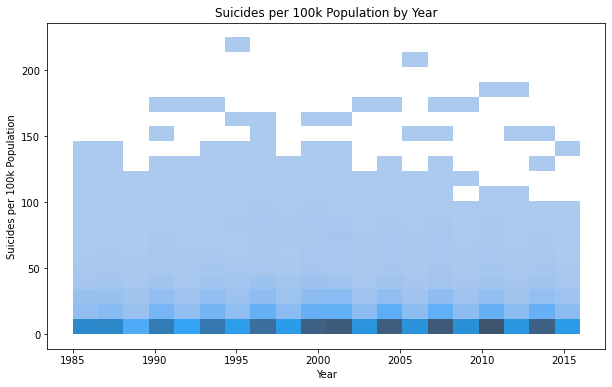

In [13]:
# Histogram of 'number of suicides / 100k' by year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='year', y='suicides/100k pop', bins=20)
plt.title('Suicides per 100k Population by Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

**4. Rank the variables to find some strong correlations between the independent variables and the dependent variable you decided.**

The code below includes a correlation matrix heatmap that can help identify strong correlations between independent variables and the dependent variable (suicide rate). Variables such as GDP per capita, HDI, and age-specific suicide rates can be examined for their correlations with suicide rates.

In [23]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix using the selected numeric columns
correlation_matrix = numeric_columns.corr()

# Rank variables for correlation
correlation_with_suicide_rate = correlation_matrix['suicides/100k pop'].abs().sort_values(ascending=False)
print("Correlation with Suicide Rate:")
print(correlation_with_suicide_rate)

Correlation with Suicide Rate:
suicides/100k pop     1.000000
suicides_no           0.306604
year                  0.039037
HDI for year          0.037290
population            0.008285
gdp_per_capita ($)    0.001785
Name: suicides/100k pop, dtype: float64


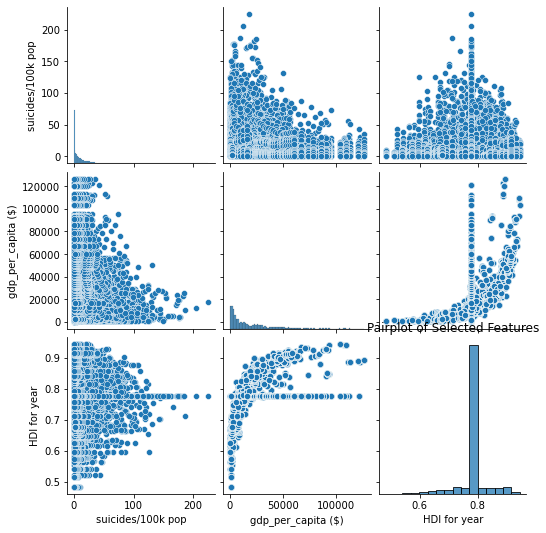

In [24]:
# Create pair plots for selected features
selected_features = ['suicides/100k pop', 'gdp_per_capita ($)', 'HDI for year']
sns.pairplot(df[selected_features])
plt.title('Pairplot of Selected Features')
plt.show()

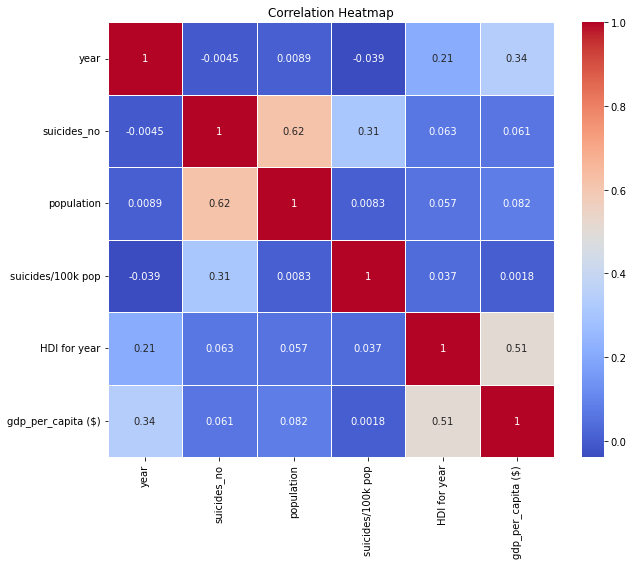

In [25]:
# For a visual aspect create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

There is a relatively strong correlation (0.62) between the population and suicide_no variables respectively. It can occur by different reasons. For example, larger populations tend to have higher absolute numbers of suicides. This is simply because there are more people, so even if the suicide rate (suicides per 100k people) is relatively constant, the total count of suicides will be higher in areas with high concentration of people. Larger populations often correlate with more complex socioeconomic factors, which can influence suicide rates. These factors might include access to mental health services, economic disparities, and social support systems.

Text(0.5, 1.0, 'Number of Suicides by Year')

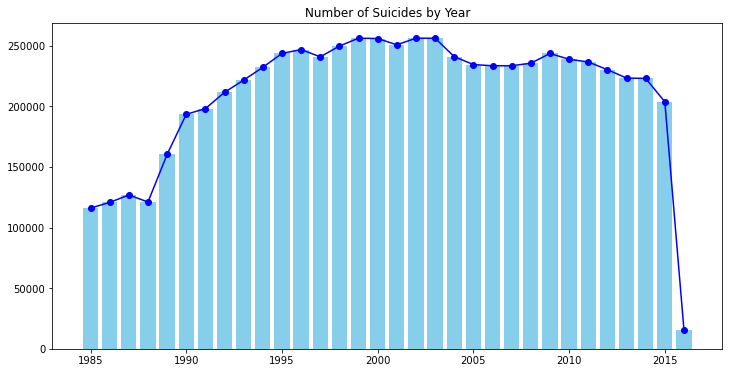

In [26]:
# Group data by year and calculate the total number of suicides for each year
suicides_by_year = df.groupby('year')['suicides_no'].sum().reset_index()

# Create a bar plot for the number of suicides by year
plt.figure(figsize=(12, 6))
plt.bar(suicides_by_year['year'], suicides_by_year['suicides_no'], color='skyblue')
plt.plot(suicides_by_year['year'], suicides_by_year['suicides_no'], marker='o', linestyle='-', color='b')
plt.title('Number of Suicides by Year')

Text(0.5, 1.0, 'Number of Suicides by Generation')

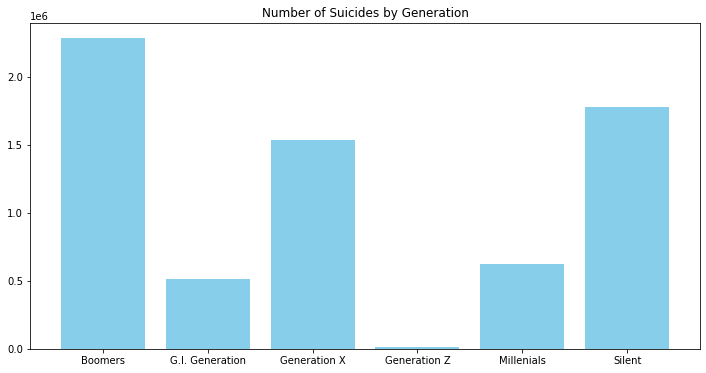

In [27]:
# Group data by generation and calculate the total number of suicides for each generation
suicides_by_generation = df.groupby('generation')['suicides_no'].sum().reset_index()

# Create a bar plot for the number of suicides by generation
plt.figure(figsize=(12, 6))
plt.bar(suicides_by_generation['generation'], suicides_by_generation['suicides_no'], color='skyblue')
plt.title('Number of Suicides by Generation')

<BarContainer object of 2 artists>

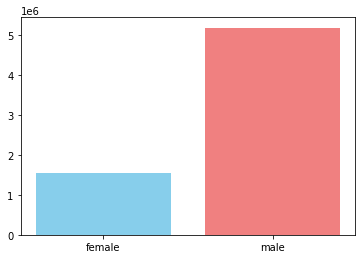

In [28]:
# Group data by gender (sex) and calculate the total number of suicides for each gender
suicides_by_gender = df.groupby('sex')['suicides_no'].sum().reset_index()

# Create a bar plot for the number of suicides by gender
#plt.figure(figsize=(8, 6))
plt.bar(suicides_by_gender['sex'], suicides_by_gender['suicides_no'], color=['skyblue', 'lightcoral'])

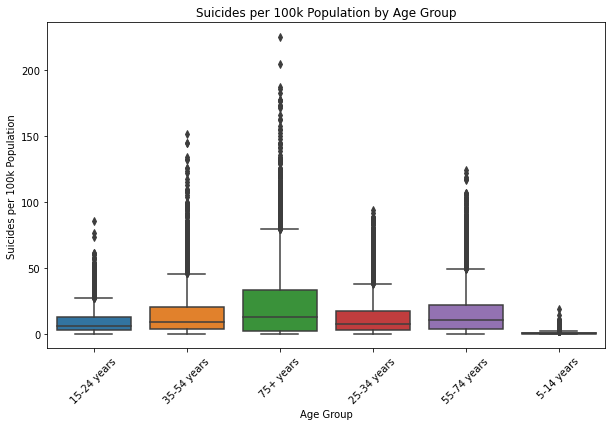

In [29]:
# Box plot of suicide rates by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age', y='suicides/100k pop')
plt.title('Suicides per 100k Population by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=45)
plt.show()

In [30]:
rate_country=df.groupby(["country"])["suicides/100k pop"].mean().sort_values(ascending=True)
rate_country

country
Saint Kitts and Nevis     0.000000
Dominica                  0.000000
Jamaica                   0.521765
Antigua and Barbuda       0.552901
Oman                      0.736111
                           ...    
Belarus                  31.075913
Hungary                  32.761516
Russian Federation       34.892377
Sri Lanka                35.295152
Lithuania                40.415573
Name: suicides/100k pop, Length: 101, dtype: float64

Text(0.5, 1.0, 'Suicide Rate - Country')

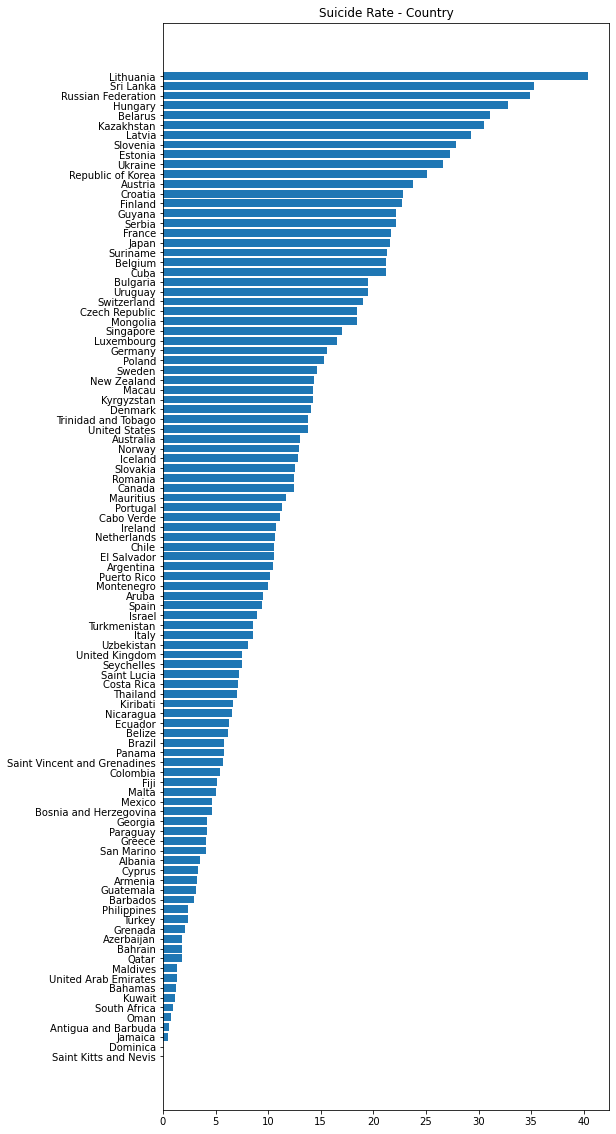

In [31]:
plt.rcParams["figure.figsize"] = (8,20)

x,y=(rate_country.index,rate_country)
plt.barh(x, y)  # rotate axis 
plt.title("Suicide Rate - Country") 

Lithuania demonstrates the highest incidence of suicide, with Sri Lanka and the Russian Federation following closely behind. These heightened rates may be linked to a range of factors, such as historical conflicts, diplomatic strains, or issues associated with governance.

Let's see if there is a connection between higher GDP per capita and a higher number of suicides

In [32]:
gpd_and_suicides_df = df.groupby('country')[['gdp_per_capita ($)', 'suicides/100k pop']].sum().reset_index()

sorted_gpd_and_suicides_df = gpd_and_suicides_df.sort_values(by=['suicides/100k pop', 'gdp_per_capita ($)'], ascending=[False, False])

sorted_gpd_and_suicides_df.head(10)

,country,gdp_per_capita ($),suicides/100k pop
75,Russian Federation,2112096,11305.13
52,Lithuania,2431504,10588.88
40,Hungary,2904716,10156.07
47,Kazakhstan,1662684,9519.52
73,Republic of Korea,5506068,9350.45
6,Austria,13088000,9076.23
95,Ukraine,627492,8931.66
46,Japan,13539888,8025.23
32,Finland,12342960,7924.11
12,Belgium,11928828,7900.50


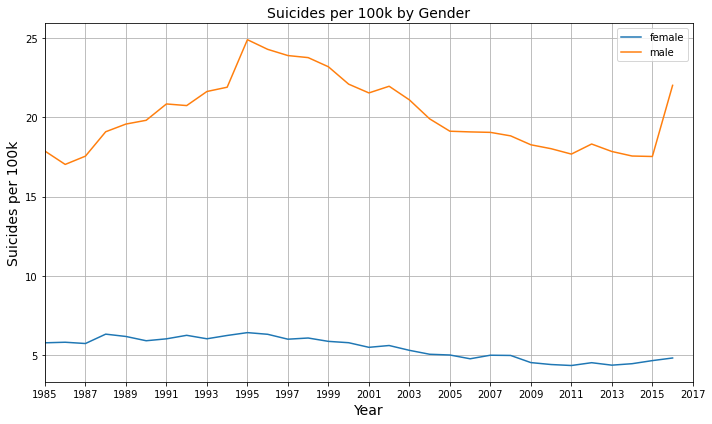

In [33]:
suicides_per_year = df.groupby('year')['suicides_no'].sum()

gender_df = df.pivot_table(index='sex', columns='year', values='suicides/100k pop', aggfunc='mean')

plt.figure(figsize=(10, 6))

for gender in gender_df.index:
    plt.plot(gender_df.columns, gender_df.loc[gender], label=gender)

plt.title('Suicides per 100k by Gender', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicides per 100k', fontsize = 14)

plt.legend()
plt.grid()

plt.xlim(min(suicides_per_year.keys()), max(suicides_per_year.keys()))

plt.xticks(range(min(suicides_per_year.index), max(suicides_per_year.index)+3, 2))

plt.tight_layout()

plt.show()

It's evident that males have approximately a fourfold higher likelihood of engaging in suicide compared to females.
The peak year for suicides among both genders was in 1995, followed by a subsequent decrease. However, there is a concerning indication that the rates may be on the rise once more.

**5. Pre-process the dataset and list the major features you want to use. Note that not all features are crucial. For example, country-year variable is a derived feature and for a classifier it would not be necessary to include the year, the country and the country-year together. In fact, one must avoid adding a derived feature and the original at the same time. List the independent features you want to use.**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pre-process the dataset and select major features
# Select relevant features for classification
selected_features = ['year', 'age', 'sex', 'gdp_per_capita ($)', 'HDI for year']

# Encode categorical features
label_encoders = {}
for feature in ['age', 'sex']:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Split data into train and test sets
X = df[selected_features]
y = df['suicide_rate_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**6. Devise a classification problem and present a prototype model. Note that we will continue to this problem in the following modules.**

In [35]:
# Prototype classification model
# Train a random forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Model Accuracy: 0.6867361610352265
Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.76      0.73      2062
         Low       0.75      0.76      0.76      2600
    Moderate       0.41      0.30      0.35       902

    accuracy                           0.69      5564
   macro avg       0.62      0.61      0.61      5564
weighted avg       0.67      0.69      0.68      5564



A prototype machine learning model, specifically a Random Forest Classifier, was developed to classify countries into suicide rate categories (e.g., low, moderate, high).
<br>
The 'suicides/100k pop' feature was used as the target variable.
Model evaluation involved assessing the performance of the Random Forest Classifier. Common evaluation metrics such as accuracy, precision, recall, and F1-score were computed to measure the model's effectiveness.
The choice of the Random Forest Classifier was made based on its suitability for classification tasks and its ability to handle complex datasets. The model's overall accuracy 68,67% is decent, but it's important to consider the specific goals of the classification task.
Further work might involve optimizing the model, exploring other machine learning algorithms, and conducting more in-depth analysis to uncover underlying patterns and drivers of suicide rates.